<a href="https://colab.research.google.com/github/H4D32/AndrewNg-ML-Python-Notebooks/blob/main/Ex5/AndrewEx5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.io import loadmat
import scipy.optimize as op

In [ ]:
# Use loadmat to load matlab files
mat=loadmat("ex5data1.mat")

# mat is a dict with key "X" for x-values, and key "y" for y values
X=mat["X"]
y=mat["y"]
Xtest=mat["Xtest"]
ytest=mat["ytest"]
Xval=mat["Xval"]
yval=mat["yval"]

In [ ]:
fig = px.scatter(x=X.reshape(12),y=y.reshape(12))
fig.show()

In [ ]:
def linearRegCostFunction(theta, X, y, Lambda):
    #cost
    m,n = X.shape
    theta = theta.reshape(n,1)
    predictions = X.dot(theta)
    err = (predictions - y)
    cost = 1/(2*m) * np.sum(err**2)
    newtheta = np.copy(theta)
    newtheta[0] = 0
    reg_cost = cost + Lambda/(2*m) * (np.sum(newtheta**2))
    #grad
    grad = (X.T @ err + (Lambda * newtheta))/m
    return reg_cost, grad

In [ ]:
def gradWrap(theta, X, y, Lambda):
  reg_cost, grad = linearRegCostFunction(theta, X, y, Lambda)
  return grad.flatten()

In [ ]:
def costWrap(theta, X, y, Lambda):
  reg_cost, grad = linearRegCostFunction(theta, X, y, Lambda)
  return reg_cost

In [ ]:
m = X.shape[0]
theta = np.ones((2,1))
X_1 = np.hstack((np.ones((m,1)),X))
cost, grad = linearRegCostFunction(theta, X_1, y, 1)
print("Cost at theta = [1 ; 1]:",cost)
print("Gradient at theta = [1 ; 1]:",grad)

Cost at theta = [1 ; 1]: 303.9931922202643
Gradient at theta = [1 ; 1]: [[-15.30301567]
 [598.25074417]]


In [ ]:
def optimizer(X,y,initial_theta,Lambda):
    Result = op.minimize(fun = costWrap, 
                                 x0 = initial_theta, 
                                 args = (X, y, Lambda),
                                 method = 'CG',
                                 jac = gradWrap);
    optimal_theta = Result.x;
    return optimal_theta

In [ ]:
Lambda = 0
theta = optimizer(X_1,y,np.zeros((2,1)),Lambda)

In [ ]:
x_value=[x for x in range(-50,40)]
y_value=[y*theta[1]+theta[0] for y in x_value]

In [ ]:
fig.add_trace(
    go.Scatter(
        x=x_value,
        y=y_value,
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=False)
)
fig.show()

In [ ]:
def learningCurve(X, y, Xval, yval, Lambda):
    """
    Returns the train and cross validation set errors for a learning curve
    """
    m,n = X.shape
    err_train, err_val = [],[]

    for i in range(1,m+1):
        Xtrain = np.copy(X[0:i,:])
        ytrain = np.copy(y[0:i,:])
        theta = optimizer(Xtrain,ytrain,np.zeros((n,1)),Lambda)
        err_train.append(linearRegCostFunction(theta, Xtrain, ytrain, Lambda)[0])
        err_val.append(linearRegCostFunction(theta, Xval, yval, Lambda)[0])
      
    return err_train, err_val

In [ ]:
Xval_1 = np.hstack((np.ones((21,1)),Xval))
error_train, error_val = learningCurve(X_1, y, Xval_1, yval, Lambda)

In [ ]:
fig2 = go.Figure(data=go.Scatter(x= list(range(12)), y=error_train, mode='lines', name = 'Train'))
fig2.add_trace(
    go.Scatter(
        x=list(range(12)),
        y=error_val,
        mode="lines",
        line=go.scatter.Line(color="red"),
        name = 'CV')
)
fig2.show()

In [ ]:
def polyFeatures(X, p):
    """
    Given a vector X, return a matrix X_poly where the p-th
    column of X contains the values of X to the p-th power.
    """
    for i in range(2,p+1):
        X = np.hstack((X,(X[:,0]**i)[:,np.newaxis]))
    
    return X

In [ ]:
p=8
X_poly = polyFeatures(X, p)
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_poly=sc_X.fit_transform(X_poly)
X_poly = np.hstack((np.ones((X_poly.shape[0],1)),X_poly))

In [ ]:
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = sc_X.transform(X_poly_test)
X_poly_test = np.hstack((np.ones((X_poly_test.shape[0],1)),X_poly_test))

In [ ]:
X_poly_val = polyFeatures(Xval, p)
X_poly_val = sc_X.transform(X_poly_val)
X_poly_val = np.hstack((np.ones((X_poly_val.shape[0],1)),X_poly_val))

In [ ]:
Lambda = 100
theta_poly = optimizer(X_poly,y,np.zeros((9,1)),Lambda)

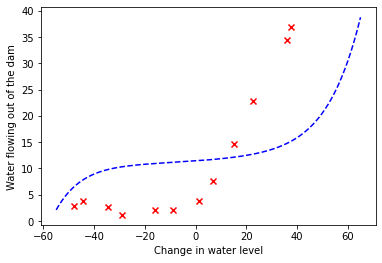

In [ ]:
# fig3 = px.scatter(x=X.reshape(12),y=y.reshape(12))
# fig3 = go.Figure()
x_value=np.linspace(-55,65,2400)
x_value_poly = polyFeatures(x_value[:,np.newaxis], p)
x_value_poly = sc_X.transform(x_value_poly)
x_value_poly = np.hstack((np.ones((x_value_poly.shape[0],1)),x_value_poly))
y_value= x_value_poly @ theta_poly

plt.scatter(X,y,marker="x",color="r")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
plt.plot(x_value,y_value,"--",color="b")
# fig3.add_trace(
#     go.Scatter(
#         x=x_value_poly,
#         y=y_value,
#         mode="lines",
#         line=go.scatter.Line(),
#         showlegend=False)
# )
# fig3.show()

In [ ]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, Lambda)

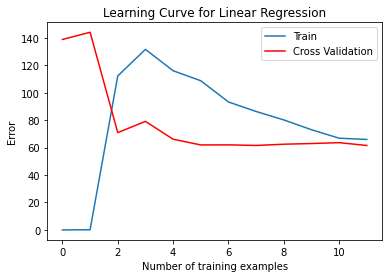

In [ ]:
plt.plot(range(12),error_train,label="Train")
plt.plot(range(12),error_val,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()